In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
 data=pd.read_csv("F:\Downloads\Airlines.csv\Airlines.csv")

In [3]:
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [4]:
data.dropna(axis = 0,subset =['Delay'],inplace = True)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [6]:
data.isnull().sum()


id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [7]:
data.nunique()


id             539383
Airline            18
Flight           6585
AirportFrom       293
AirportTo         293
DayOfWeek           7
Time             1131
Length            426
Delay               2
dtype: int64

In [8]:
d1=data.loc[data['Delay'] == 1 ]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DayOfWeek', ylabel='Length'>

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


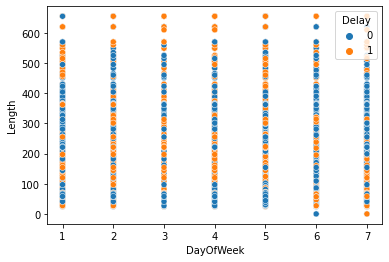

In [9]:
sns.scatterplot( data['DayOfWeek'], data['Length'], hue =data["Delay"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DayOfWeek', ylabel='Length'>

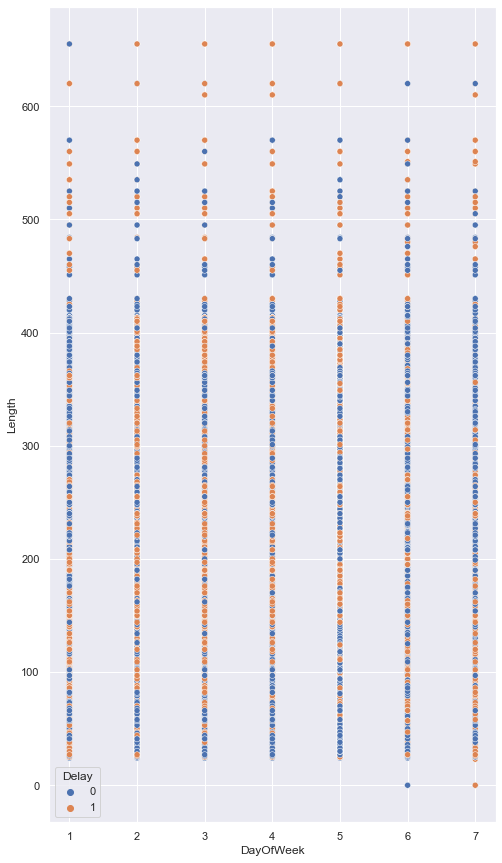

In [10]:
sns.set(rc={"figure.figsize":(8,15)})
sns.scatterplot( data['DayOfWeek'], data['Length'], hue =data["Delay"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

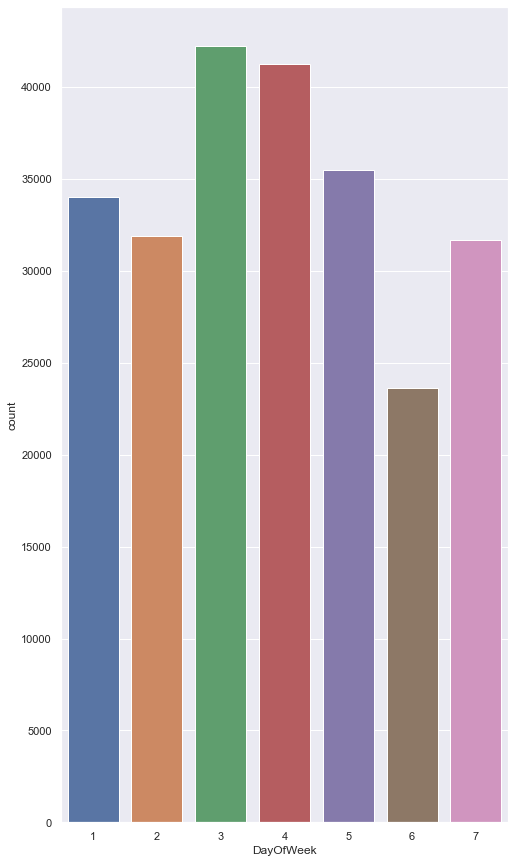

In [11]:
sns.countplot(d1["DayOfWeek"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline', ylabel='count'>

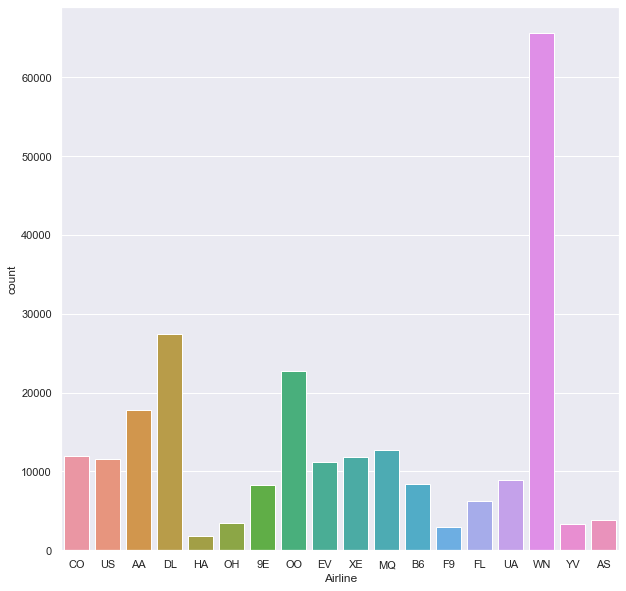

In [12]:
sns.set(rc={"figure.figsize":(10,10)})
sns.countplot(d1["Airline"])

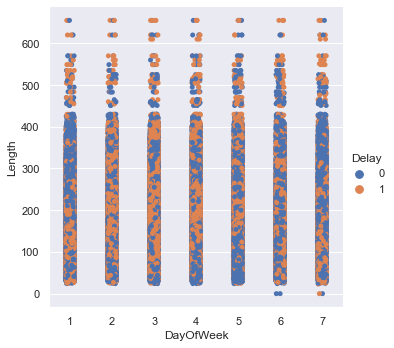

In [13]:
sns.catplot(x="DayOfWeek", y="Length", hue="Delay", data=data)

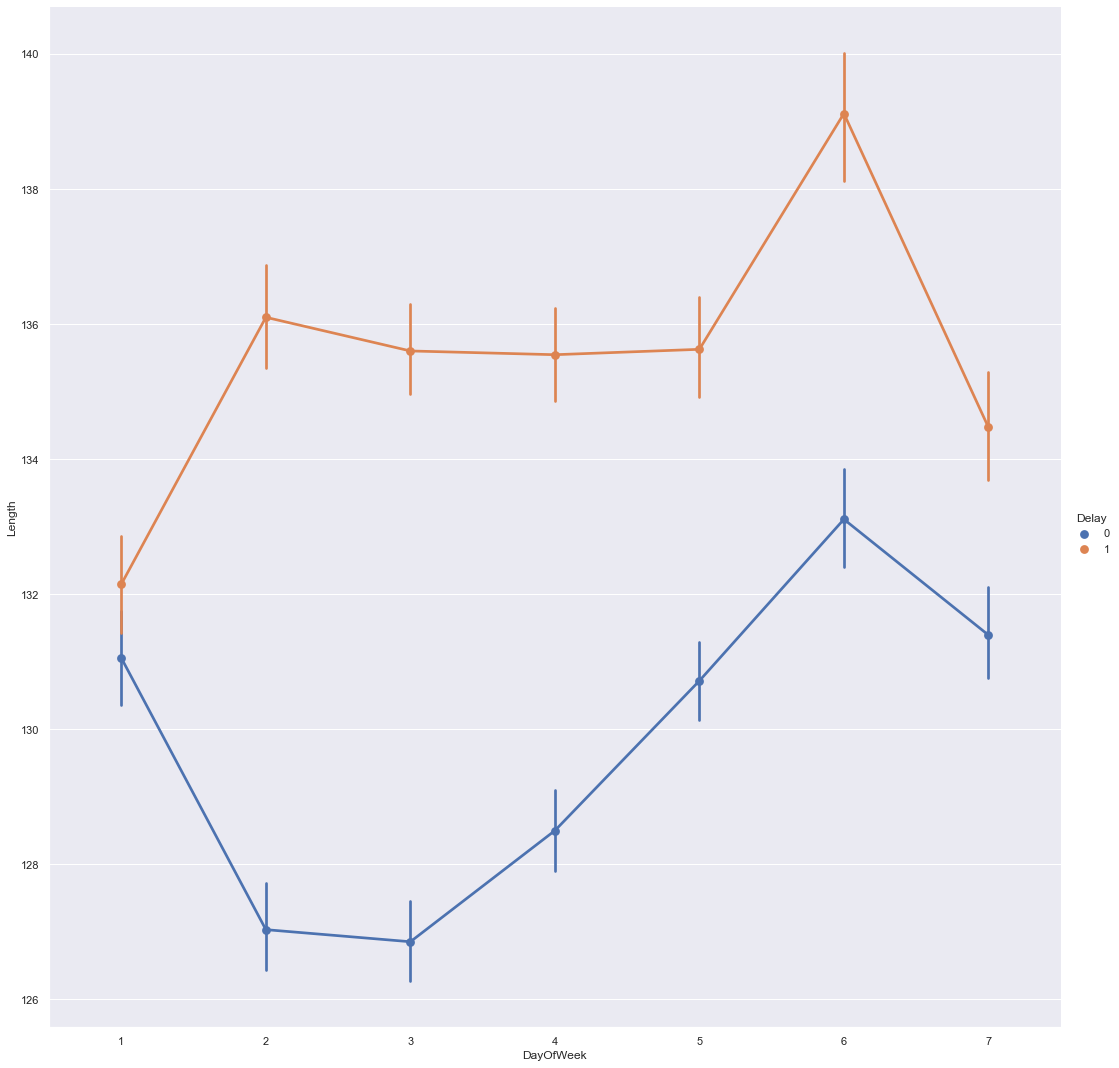

In [14]:
sns.catplot(x="DayOfWeek", y="Length", hue="Delay", data=data, kind='point', height=15, aspect=1)

<AxesSubplot:xlabel='Airline', ylabel='count'>

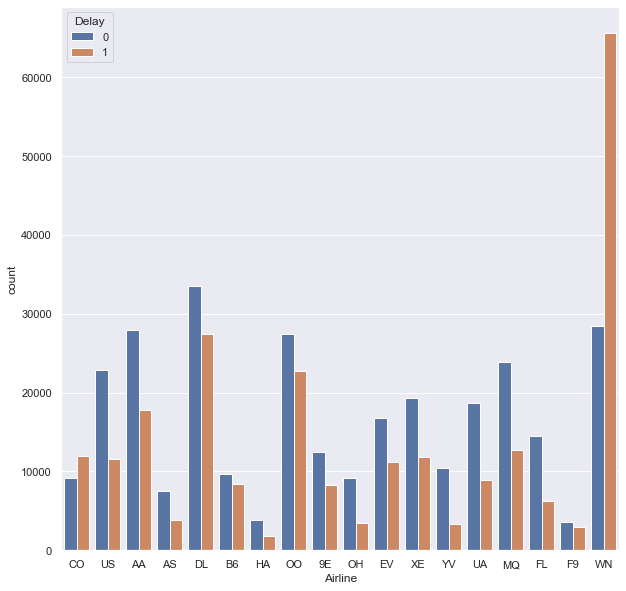

In [15]:
sns.countplot(x=data["Airline"], hue=data["Delay"])

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

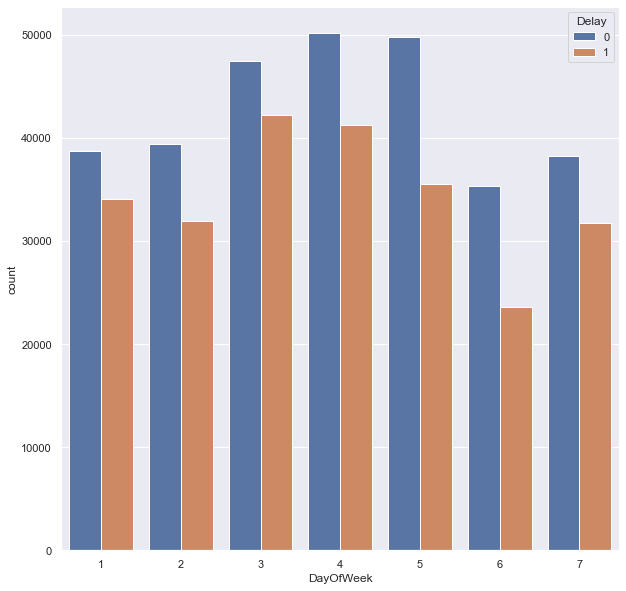

In [16]:
sns.countplot(x=data["DayOfWeek"], hue=data["Delay"])

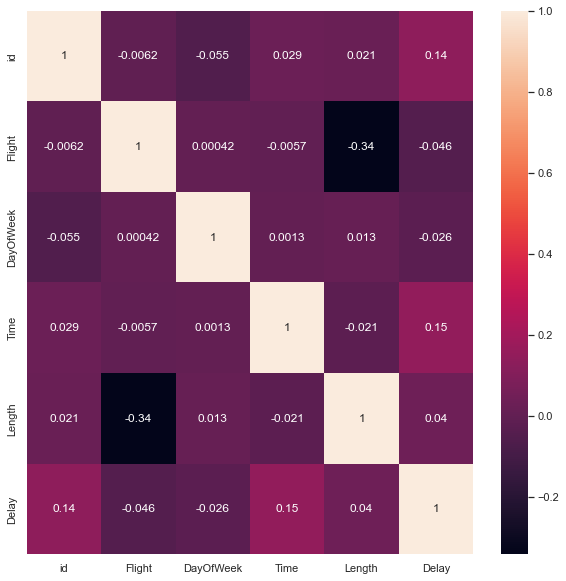

In [17]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [18]:
data = data.drop(["id"],axis=1)

In [19]:
data.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0


In [20]:
df=data.copy()

In [21]:
df['Airline_Number'] = df['Airline'].astype('category').cat.codes

In [22]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline_Number
0,CO,269,SFO,IAH,3,15,205,1,4
1,US,1558,PHX,CLT,3,15,222,1,14
2,AA,2400,LAX,DFW,3,20,165,1,1
3,AA,2466,SFO,DFW,3,20,195,1,1
4,AS,108,ANC,SEA,3,30,202,0,2
...,...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0,4
539379,FL,398,SEA,ATL,5,1439,305,0,8
539380,FL,609,SFO,MKE,5,1439,255,0,8
539381,UA,78,HNL,SFO,5,1439,313,1,13


In [23]:
df['AirportTo_No'] = df['AirportTo'].astype('category').cat.codes
df['AirportFrom_No'] = df['AirportFrom'].astype('category').cat.codes
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline_Number,AirportTo_No,AirportFrom_No
0,CO,269,SFO,IAH,3,15,205,1,4,135,253
1,US,1558,PHX,CLT,3,15,222,1,14,60,217
2,AA,2400,LAX,DFW,3,20,165,1,1,80,154
3,AA,2466,SFO,DFW,3,20,195,1,1,80,253
4,AS,108,ANC,SEA,3,30,202,0,2,252,14
...,...,...,...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0,4,264,203
539379,FL,398,SEA,ATL,5,1439,305,0,8,16,252
539380,FL,609,SFO,MKE,5,1439,255,0,8,184,253
539381,UA,78,HNL,SFO,5,1439,313,1,13,253,128


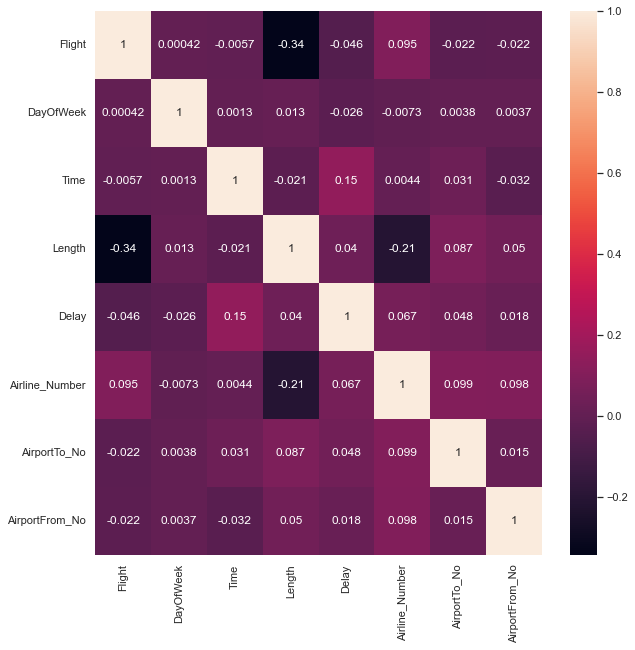

In [24]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:

data

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


In [26]:
data=data.drop(["DayOfWeek", "Flight"], axis=1)

In [27]:
data

,Airline,AirportFrom,AirportTo,Time,Length,Delay
0,CO,SFO,IAH,15,205,1
1,US,PHX,CLT,15,222,1
2,AA,LAX,DFW,20,165,1
3,AA,SFO,DFW,20,195,1
4,AS,ANC,SEA,30,202,0
...,...,...,...,...,...,...
539378,CO,OGG,SNA,1439,326,0
539379,FL,SEA,ATL,1439,305,0
539380,FL,SFO,MKE,1439,255,0
539381,UA,HNL,SFO,1439,313,1


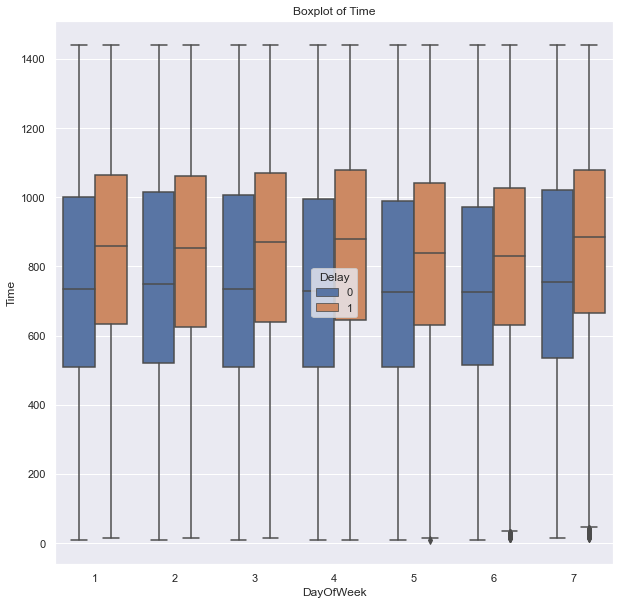

In [28]:
sns.boxplot(x=df["DayOfWeek"], y=df["Time"], hue=df["Delay"])
plt.title("Boxplot of Time")
plt.show()

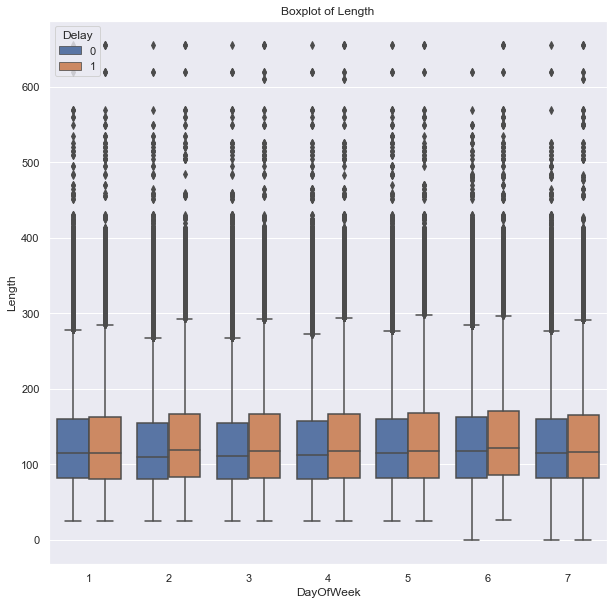

In [29]:
sns.boxplot(x=df["DayOfWeek"], y=df["Length"], hue=df["Delay"])
plt.title("Boxplot of Length")
plt.show()

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data["Length"])
print("Outliers from IQR method: ", sample_outliers)
print

In [30]:
from scipy.stats.mstats import winsorize

In [31]:
print('90% quantile:   ', df['Length'].quantile(0.90))       
print('92.5% quantile: ', df['Length'].quantile(0.925))      
print('95% quantile:   ', df['Length'].quantile(0.95))       
print('97.5% quantile: ', df['Length'].quantile(0.975))    
print('99% quantile:   ', df['Length'].quantile(0.99))      
print('99.9% quantile: ', df['Length'].quantile(0.999))      

90% quantile:    227.0
92.5% quantile:  250.0
95% quantile:    280.0
97.5% quantile:  327.0
99% quantile:    368.0
99.9% quantile:  455.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:xlabel='Length_wins_925%', ylabel='Density'>

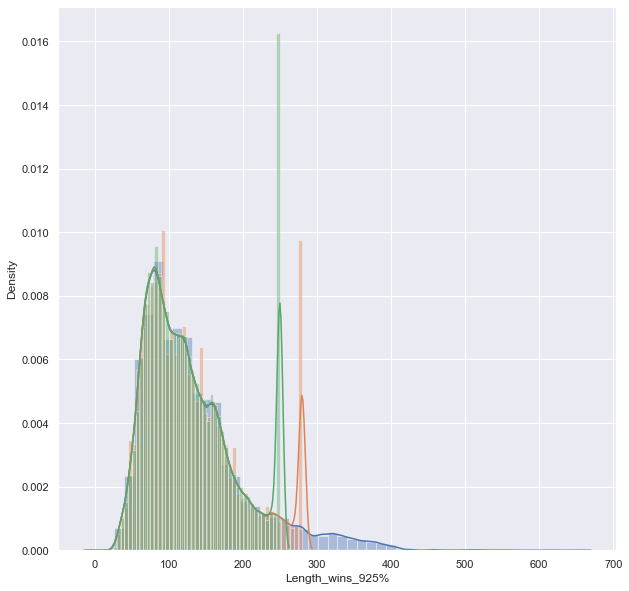

In [32]:
df_win = df.copy(deep=True)

#Winsorize on right-tail
df_win['Length_wins_95%'] = winsorize(df['Length'], limits=(0, 0.05))
df_win['Length_wins_925%'] = winsorize(df['Length'], limits=(0, 0.075))

df_win.describe()

#Distribution plot: Crime rate per capita by town
sns.distplot(df['Length'])

#New distribution plots 
sns.distplot(df_win['Length_wins_95%'])
sns.distplot(df_win['Length_wins_925%'])

In [33]:
df_win

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline_Number,AirportTo_No,AirportFrom_No,Length_wins_95%,Length_wins_925%
0,CO,269,SFO,IAH,3,15,205,1,4,135,253,205,205
1,US,1558,PHX,CLT,3,15,222,1,14,60,217,222,222
2,AA,2400,LAX,DFW,3,20,165,1,1,80,154,165,165
3,AA,2466,SFO,DFW,3,20,195,1,1,80,253,195,195
4,AS,108,ANC,SEA,3,30,202,0,2,252,14,202,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0,4,264,203,280,250
539379,FL,398,SEA,ATL,5,1439,305,0,8,16,252,280,250
539380,FL,609,SFO,MKE,5,1439,255,0,8,184,253,255,250
539381,UA,78,HNL,SFO,5,1439,313,1,13,253,128,280,250


In [34]:
data["Length_win"]=df_win['Length_wins_95%']

In [35]:
data

,Airline,AirportFrom,AirportTo,Time,Length,Delay,Length_win
0,CO,SFO,IAH,15,205,1,205
1,US,PHX,CLT,15,222,1,222
2,AA,LAX,DFW,20,165,1,165
3,AA,SFO,DFW,20,195,1,195
4,AS,ANC,SEA,30,202,0,202
...,...,...,...,...,...,...,...
539378,CO,OGG,SNA,1439,326,0,280
539379,FL,SEA,ATL,1439,305,0,280
539380,FL,SFO,MKE,1439,255,0,255
539381,UA,HNL,SFO,1439,313,1,280


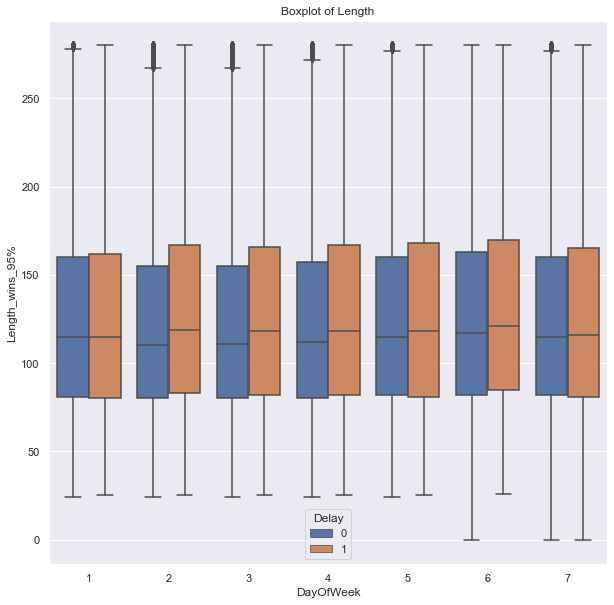

In [36]:
sns.boxplot(x=df_win["DayOfWeek"], y=df_win["Length_wins_95%"], hue=df_win["Delay"])
plt.title("Boxplot of Length")
plt.show()

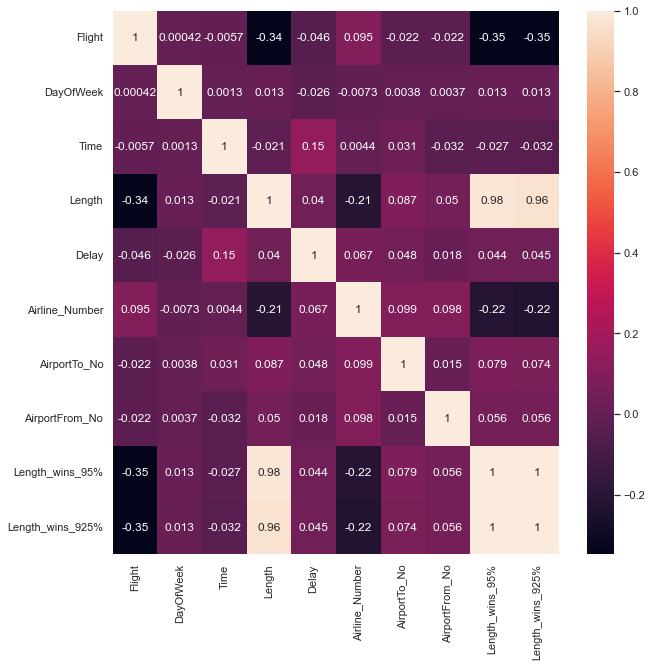

In [38]:
sns.heatmap(df_win.corr(),annot=True)
plt.show()

In [37]:
data.describe()

,Time,Length,Delay,Length_win
count,539383.000000,539383.000000,539383.000000,539383.000000
mean,802.728963,132.202007,0.445442,129.434033
std,278.045911,70.117016,0.497015,61.947937
min,10.000000,0.000000,0.000000,0.000000
25%,565.000000,81.000000,0.000000,81.000000
50%,795.000000,115.000000,0.000000,115.000000
75%,1035.000000,162.000000,1.000000,162.000000
max,1439.000000,655.000000,1.000000,280.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   AirportFrom  539383 non-null  object
 2   AirportTo    539383 non-null  object
 3   Time         539383 non-null  int64 
 4   Length       539383 non-null  int64 
 5   Delay        539383 non-null  int64 
 6   Length_win   539383 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 28.8+ MB


In [40]:
df_copy=df.drop(["Flight", "DayOfWeek","Length"], axis=1)
df_copy["Length_win"]=df_win['Length_wins_95%']
df_copy

,Airline,AirportFrom,AirportTo,Time,Delay,Airline_Number,AirportTo_No,AirportFrom_No,Length_win
0,CO,SFO,IAH,15,1,4,135,253,205
1,US,PHX,CLT,15,1,14,60,217,222
2,AA,LAX,DFW,20,1,1,80,154,165
3,AA,SFO,DFW,20,1,1,80,253,195
4,AS,ANC,SEA,30,0,2,252,14,202
...,...,...,...,...,...,...,...,...,...
539378,CO,OGG,SNA,1439,0,4,264,203,280
539379,FL,SEA,ATL,1439,0,8,16,252,280
539380,FL,SFO,MKE,1439,0,8,184,253,255
539381,UA,HNL,SFO,1439,1,13,253,128,280


In [41]:
X = df_copy.drop(["Delay", "Airline","AirportFrom", "AirportTo"], axis=1)
y=df_copy['Delay']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [42]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Airline         539383 non-null  object
 1   AirportFrom     539383 non-null  object
 2   AirportTo       539383 non-null  object
 3   Time            539383 non-null  int64 
 4   Delay           539383 non-null  int64 
 5   Airline_Number  539383 non-null  int8  
 6   AirportTo_No    539383 non-null  int16 
 7   AirportFrom_No  539383 non-null  int16 
 8   Length_win      539383 non-null  int64 
dtypes: int16(2), int64(3), int8(1), object(3)
memory usage: 27.3+ MB


In [43]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6593702685165158

In [45]:
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rf,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=40),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [46]:
cv.best_params_

{'max_depth': 16, 'n_estimators': 250}

In [47]:
rfc= RandomForestClassifier(n_estimators=250, max_depth=16)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=250)

In [48]:
y_pred = rfc.predict(X_test)

In [50]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6681148224824646


Fitting 5 folds for each of 10 candidates, totalling 50 fits
